In [1]:
# Sefira Karina / s3766199

Chosen Dataset : Mice Protein
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression


## Task 1: Retrieving and Preparing the Data
The student should retrieve the data correctly and prepare the data appropriately.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

dataset = pd.read_csv('Data_Cortex_Nuclear.csv',engine='python')

dataset.rename(columns={dataset.columns[0]: 'mouse_id'}, inplace=True)


In [3]:
dataset.sample(3)

,mouse_id,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
1005,3513_1,0.423526,0.668328,0.374947,2.846415,5.449724,0.258804,0.185299,6.193997,0.256470,...,0.125781,0.498532,0.141370,0.164006,0.162298,1.169665,Ts65Dn,Saline,S/C,t-SC-s
585,3416_1,0.641872,0.859113,0.327980,2.652611,4.201576,0.190246,0.159704,2.515862,0.206404,...,0.108265,0.416937,0.149047,NaN,NaN,1.796279,Ts65Dn,Memantine,C/S,t-CS-m
67,322_8,0.379945,0.504505,0.302977,2.062867,4.128476,0.242068,0.179984,3.698002,0.180964,...,0.142773,0.496806,NaN,NaN,NaN,1.614975,Control,Memantine,C/S,c-CS-m


In [4]:
dataset.size

88560

before proceeding to data cleaning, dataFrame.dtypes is used to check the data type of all columns. All columns related to the proteins are identified as float64 and the other columns are identified as object str. No conversion is needed because the data types are already suitable for the later parts.

In [5]:
dataset.dtypes

mouse_id            object
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
                    ...   
RRP1_N             float64
BAX_N              float64
ARC_N              float64
ERBB4_N            float64
nNOS_N             float64
Tau_N              float64
G

With dataFrame.value_counts(dropna=False), the columns not related to proteins are checked for any odd values such as typos, or whitespace. Turns out all the values appear to be normal. and no further action was needed.

In [6]:
dataset['class'].value_counts(dropna=False)

c-SC-m    150
c-CS-m    150
t-SC-s    135
c-CS-s    135
t-SC-m    135
c-SC-s    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64

In [7]:
dataset['Genotype'].value_counts(dropna=False)

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [8]:
dataset['Treatment'].value_counts(dropna=False)

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [9]:
dataset['Behavior'].value_counts(dropna=False)

S/C    555
C/S    525
Name: Behavior, dtype: int64

The next thing to do is to check for NaN values. As it can be seen bellow, there are several collumns that contain empty rows. The NaN values will be replaced with the average values of each collumn

In [10]:
dataset.isnull().sum()

mouse_id             0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
                  ... 
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N              0
GluR4_N              0
IL1B_N               0
P3525_N              0
pCASP9_N             0
PSD95_N    

In [11]:
for i in range(1,78):
    dataset.iloc[:, i].fillna((dataset.iloc[:, i].mean()), inplace=True)

dataset.isnull().sum()

mouse_id           0
DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
                  ..
RRP1_N             0
BAX_N              0
ARC_N              0
ERBB4_N            0
nNOS_N             0
Tau_N              0
GFAP_N             0
GluR3_N            0
GluR4_N            0
IL1B_N             0
P3525_N            0
pCASP9_N           0
PSD95_N            0
SNCA_N             0
Ubiquitin_N        0
pGSK3B_Tyr216_N    0
SHH_N        

Now that all the empty values are replaced with the mean, there is a possibility of the existent of negative values. The rows that contains negative values will be dropped.

In [12]:
dataset.iloc[: , 1 : 78].columns[(dataset.iloc[: , 1 : 78] < 0).any()]

Index(['RRP1_N'], dtype='object')

In [13]:
dataset.drop( dataset[ dataset['RRP1_N'] < 0 ].index , inplace=True)

In [14]:
dataset.size

88478

## Task 2.1: Explore each column
Explore each column (or at least 10 columns if there are more than 10 columns),
using appropriate descriptive statistics and graphs (if appropriate). Graphs should be formatted appropriately.

In this part, the dataset was divided into 6 categories, and thus are: (1) data with control classes,  (2) data with trisomy classes, (3) data with SC behaviour, (4) data with CS behaviour, (5) data with control genotype, (6) data with Ts65Dn genotype. Ten different protein columns are chosen to see if there is something unique that distinguish the level of protein within that particular protein.

In [15]:

fake_data = dataset.copy()

control_data = fake_data[(fake_data['class'] == "c-SC-s") | (fake_data['class']== 'c-CS-m') | \
              (fake_data['class']== 'c-CS-s') | (fake_data['class']== 'c-SC-m')]

trisomy_data = fake_data[(fake_data['class'] != "c-SC-s") & (fake_data['class']!= 'c-CS-m') & \
              (fake_data['class']!= 'c-CS-s') & (fake_data['class']!= 'c-SC-m')]

sc_data = fake_data[(fake_data['Behavior'] != "C/S")]
cs_data = fake_data[(fake_data['Behavior'] != "S/C")]

saline_data = fake_data[(fake_data['Treatment'] != "Memantine")]
memantine_data = fake_data[(fake_data['Treatment'] != "Saline")]

c_data = fake_data[(fake_data['Genotype'] != "Ts65Dn")]
t_data = fake_data[(fake_data['Genotype'] != "control")]

control_data['DYRK1A_N'].head()


0    0.503644
1    0.514617
2    0.509183
3    0.442107
4    0.434940
Name: DYRK1A_N, dtype: float64

In [16]:
def plot_comparison(df1, df2, col, col2, ex, ex2):
    
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    df1.boxplot(column=col, return_type='axes', ax=ax[0])
    
    if col2 != None:
        df2.boxplot(column=col2, return_type='axes', ax=ax[1])
    else:
        df2.boxplot(column=col, return_type='axes', ax=ax[1])
    ax[0].set_xlabel('in ' + ex, fontsize=11)
    ax[1].set_xlabel('in ' + ex2, fontsize=11)

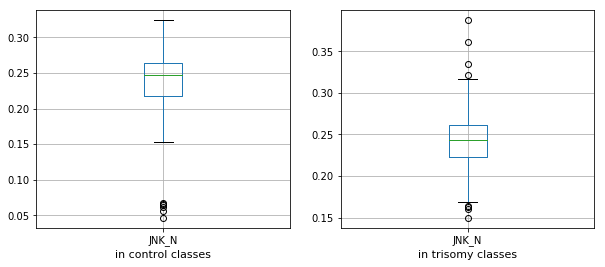

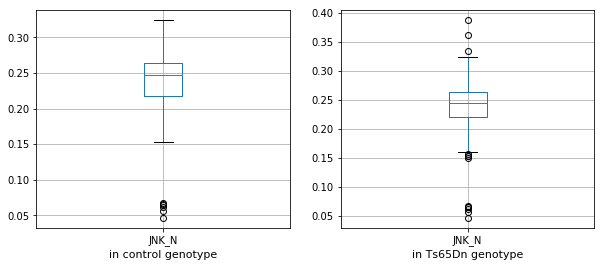

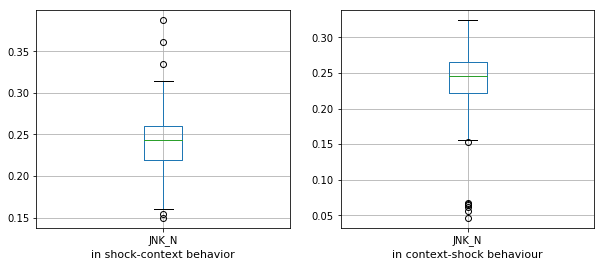

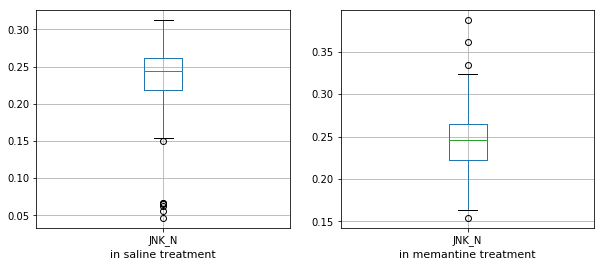

In [17]:
plot_comparison(control_data, trisomy_data ,'JNK_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'JNK_N', None, 'control genotype', 'Ts65Dn genotype')
plot_comparison(sc_data, cs_data ,'JNK_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'JNK_N', None, 'saline treatment', 'memantine treatment')

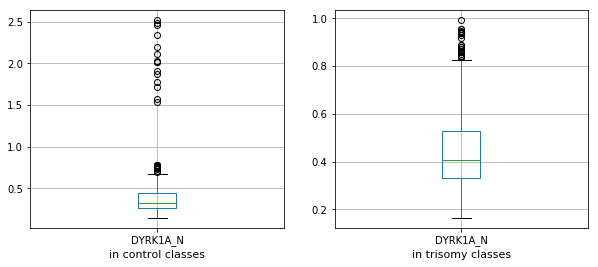

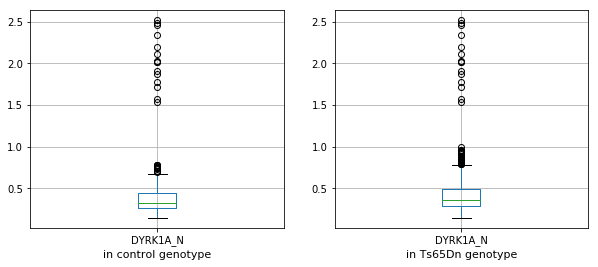

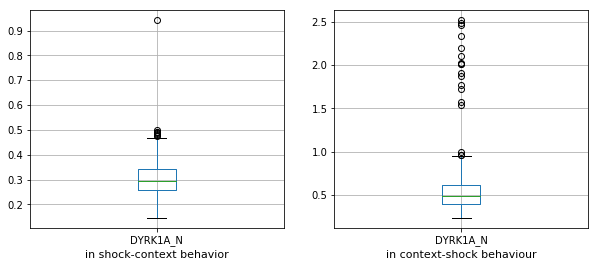

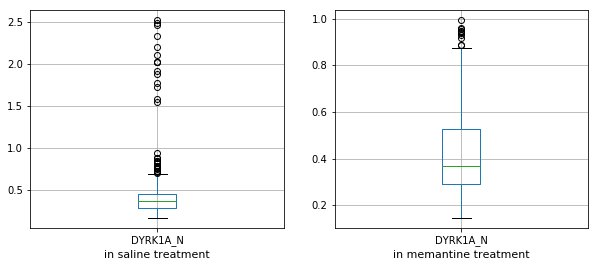

In [18]:
plot_comparison(control_data, trisomy_data ,'DYRK1A_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'DYRK1A_N', None, 'control genotype', 'Ts65Dn genotype')
plot_comparison(sc_data, cs_data ,'DYRK1A_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'DYRK1A_N', None, 'saline treatment', 'memantine treatment')


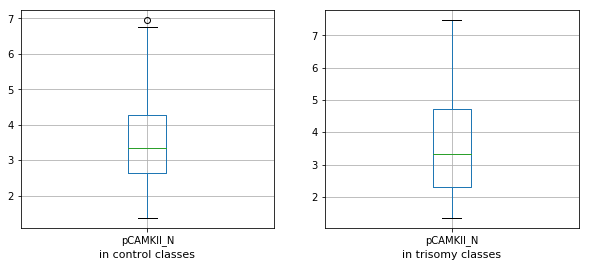

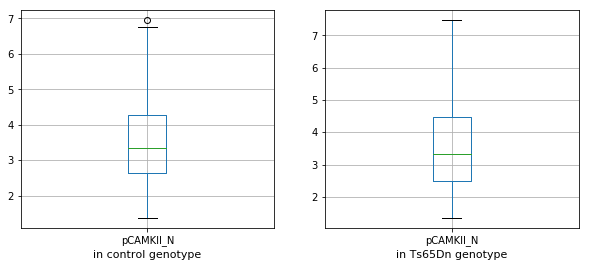

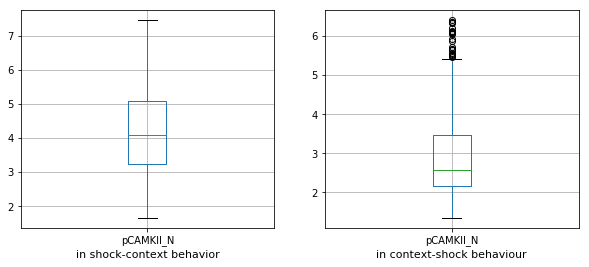

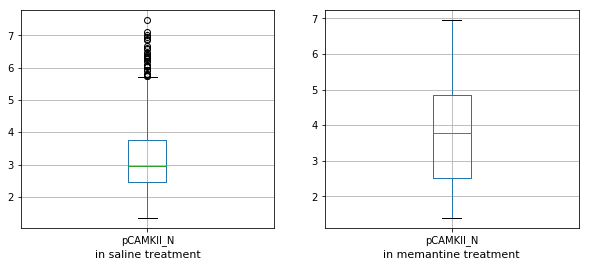

In [19]:
plot_comparison(control_data, trisomy_data ,'pCAMKII_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'pCAMKII_N', None, 'control genotype', 'Ts65Dn genotype')
plot_comparison(sc_data, cs_data ,'pCAMKII_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'pCAMKII_N', None, 'saline treatment', 'memantine treatment')

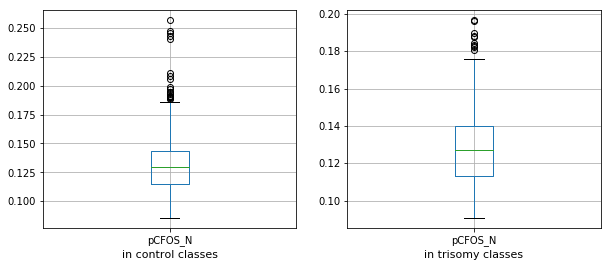

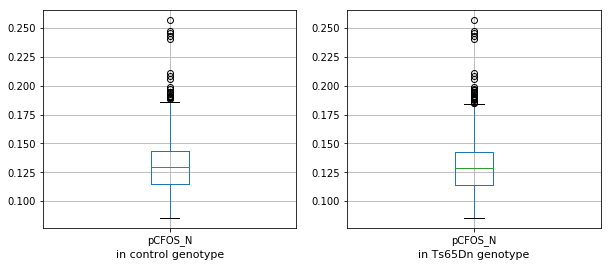

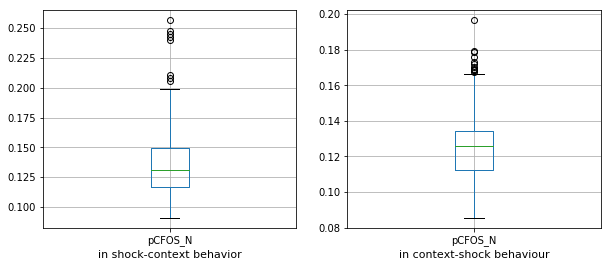

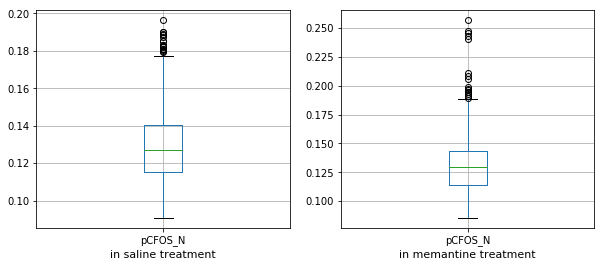

In [20]:
plot_comparison(control_data, trisomy_data ,'pCFOS_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'pCFOS_N', None, 'control genotype', 'Ts65Dn genotype')

plot_comparison(sc_data, cs_data ,'pCFOS_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'pCFOS_N', None, 'saline treatment', 'memantine treatment')

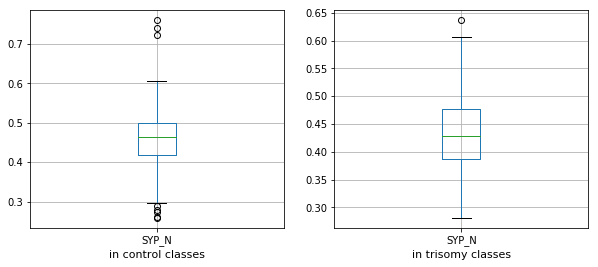

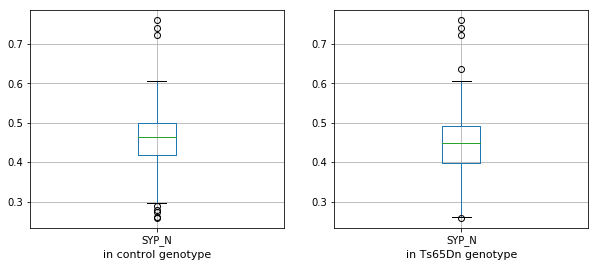

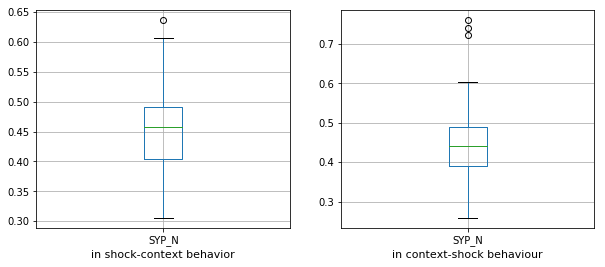

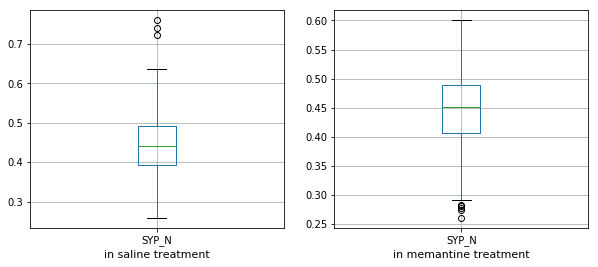

In [21]:
plot_comparison(control_data, trisomy_data ,'SYP_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'SYP_N', None, 'control genotype', 'Ts65Dn genotype')

plot_comparison(sc_data, cs_data ,'SYP_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'SYP_N', None, 'saline treatment', 'memantine treatment')

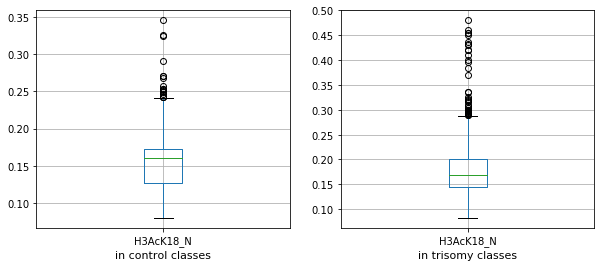

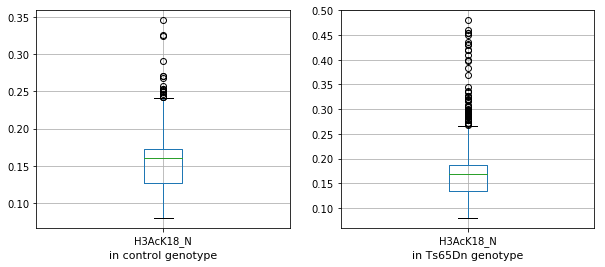

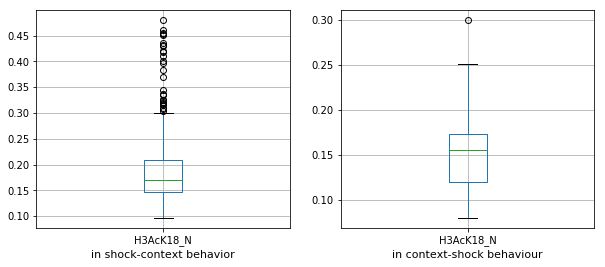

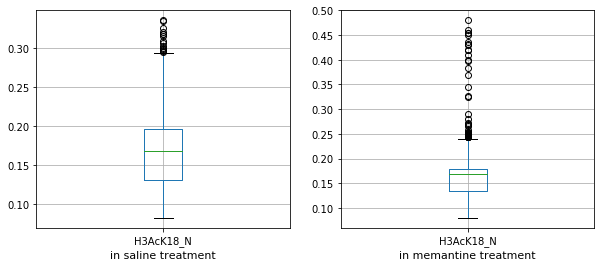

In [22]:
plot_comparison(control_data, trisomy_data ,'H3AcK18_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'H3AcK18_N', None, 'control genotype', 'Ts65Dn genotype')

plot_comparison(sc_data, cs_data ,'H3AcK18_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'H3AcK18_N', None, 'saline treatment', 'memantine treatment')

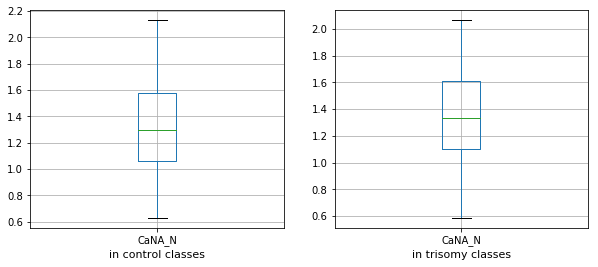

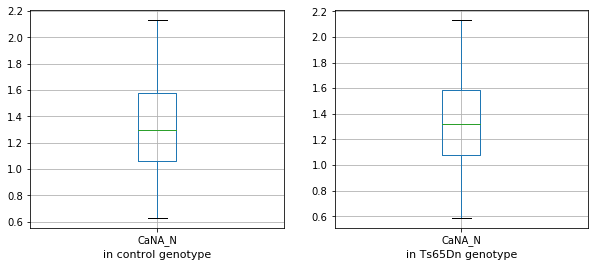

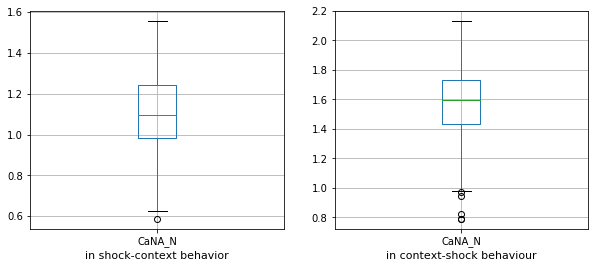

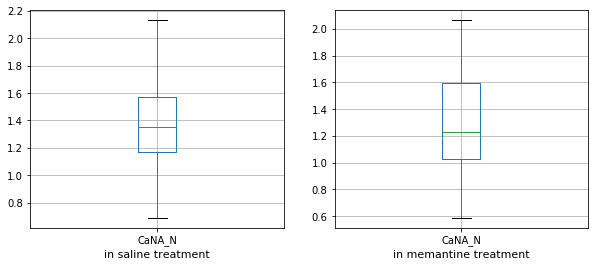

In [23]:
plot_comparison(control_data, trisomy_data ,'CaNA_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'CaNA_N', None, 'control genotype', 'Ts65Dn genotype')

plot_comparison(sc_data, cs_data ,'CaNA_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'CaNA_N', None, 'saline treatment', 'memantine treatment')

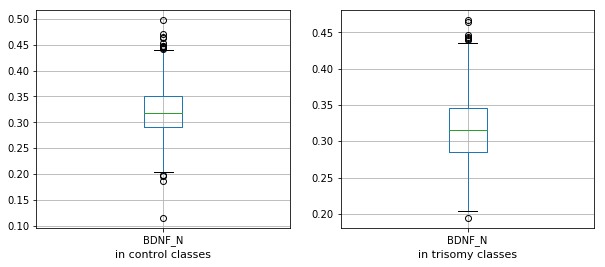

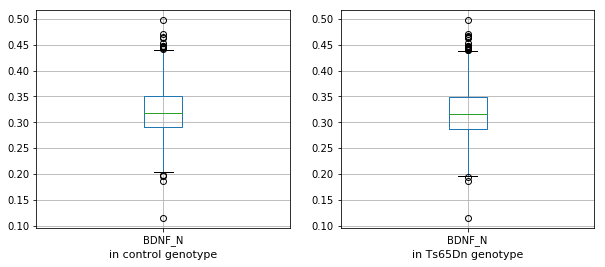

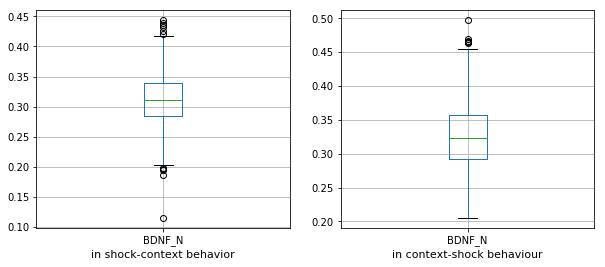

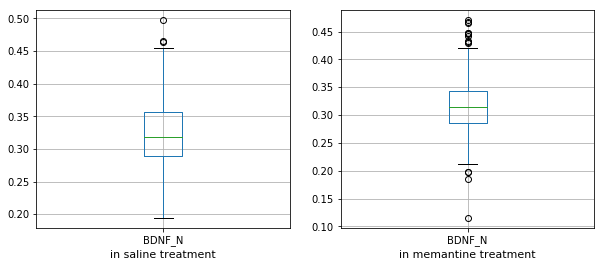

In [24]:
plot_comparison(control_data, trisomy_data ,'BDNF_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'BDNF_N', None, 'control genotype', 'Ts65Dn genotype')

plot_comparison(sc_data, cs_data ,'BDNF_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'BDNF_N', None, 'saline treatment', 'memantine treatment')

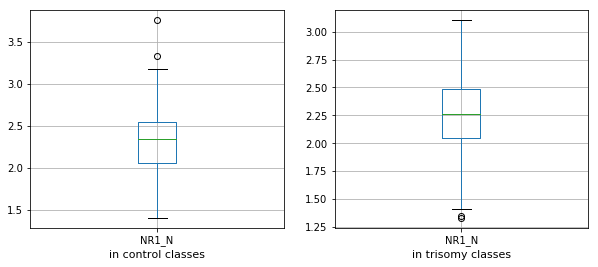

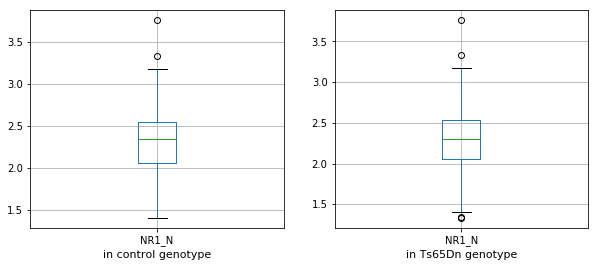

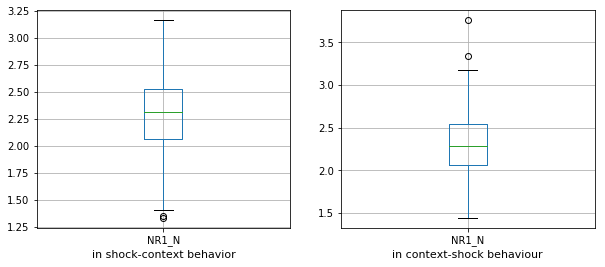

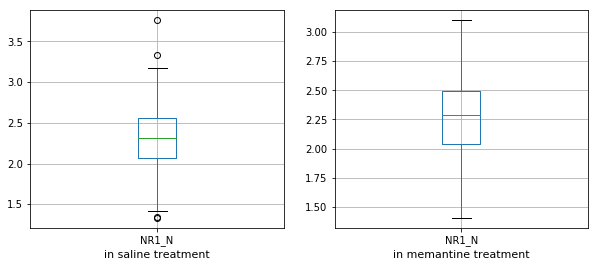

In [25]:
plot_comparison(control_data, trisomy_data ,'NR1_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'NR1_N', None, 'control genotype', 'Ts65Dn genotype')

plot_comparison(sc_data, cs_data ,'NR1_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'NR1_N', None, 'saline treatment', 'memantine treatment')

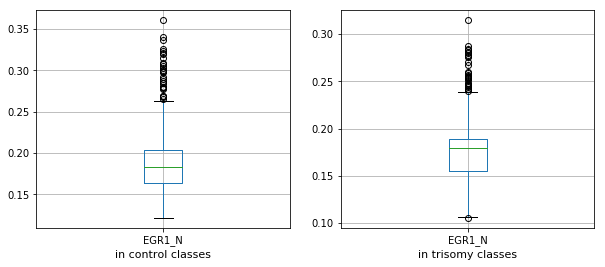

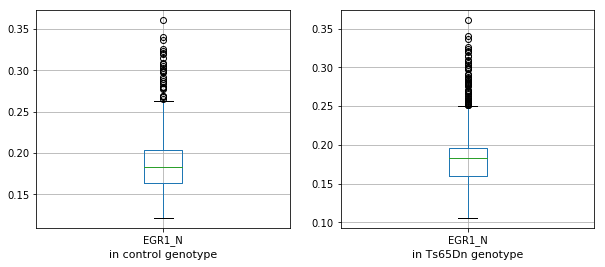

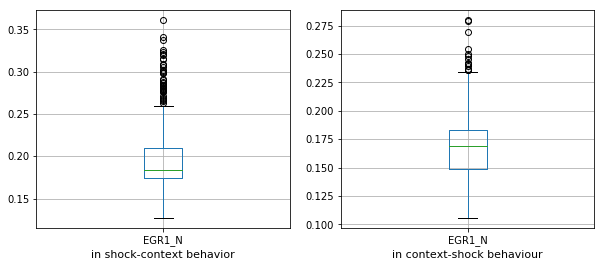

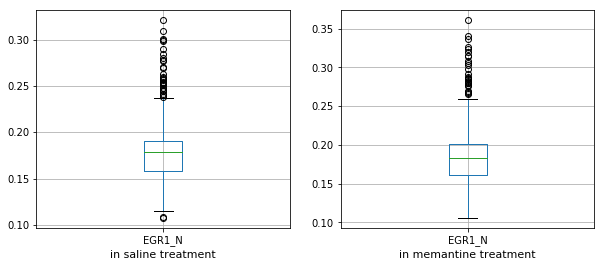

In [26]:
plot_comparison(control_data, trisomy_data ,'EGR1_N', None, 'control classes', 'trisomy classes')
plot_comparison(c_data, t_data ,'EGR1_N', None, 'control genotype', 'Ts65Dn genotype')

plot_comparison(sc_data, cs_data ,'EGR1_N', None,'shock-context behavior', 'context-shock behaviour')
plot_comparison(saline_data, memantine_data ,'EGR1_N', None, 'saline treatment', 'memantine treatment')

## Task 2.2: Explore the relationship between pairs of attributes
Explore the relationship between all pairs of attributes (or at least 10 pairs of attributes, if there are more in the data),
and show the relationships in an appropriate graphs.
Each of the attribute pair should address a plausible hypothesis for the data concerned.
Graphs should be formatted appropriately.

In [27]:
def get_random_cols(num):
    fake_data = dataset[dataset.iloc[: , 1 : 78].columns.to_series().sample(num)]
    return list(fake_data.columns.values)

In [28]:
def plot_many(col_num, x, y, x_col, df, title):
    cols = get_random_cols(col_num)
    fig, axes = plt.subplots(int(col_num/2), 2, figsize=(x, y))

    i= 0
    for r in range(5):
        for c in range(2):
            sns.swarmplot(x=x_col, y=cols[i], data=df, ax=axes[r,c])
            i = i +1
    plt.title(title , x=-0.2, y=6, fontsize=16)

The first hypothesis is that there is a different protein levels in the proteins of each class. The method to do this is to make a function that randomly select multiple columns and plot them against the class. The method was run several times. And the result is that in most proteins the levels are more or less the same for each class like in “GIuR3_N”, “MEK_N”, and “BAX_N”. (the figures for these protein might not appear in the figure bellow as the method bellow plot the proteins randomly, those figures can be seen in the report).

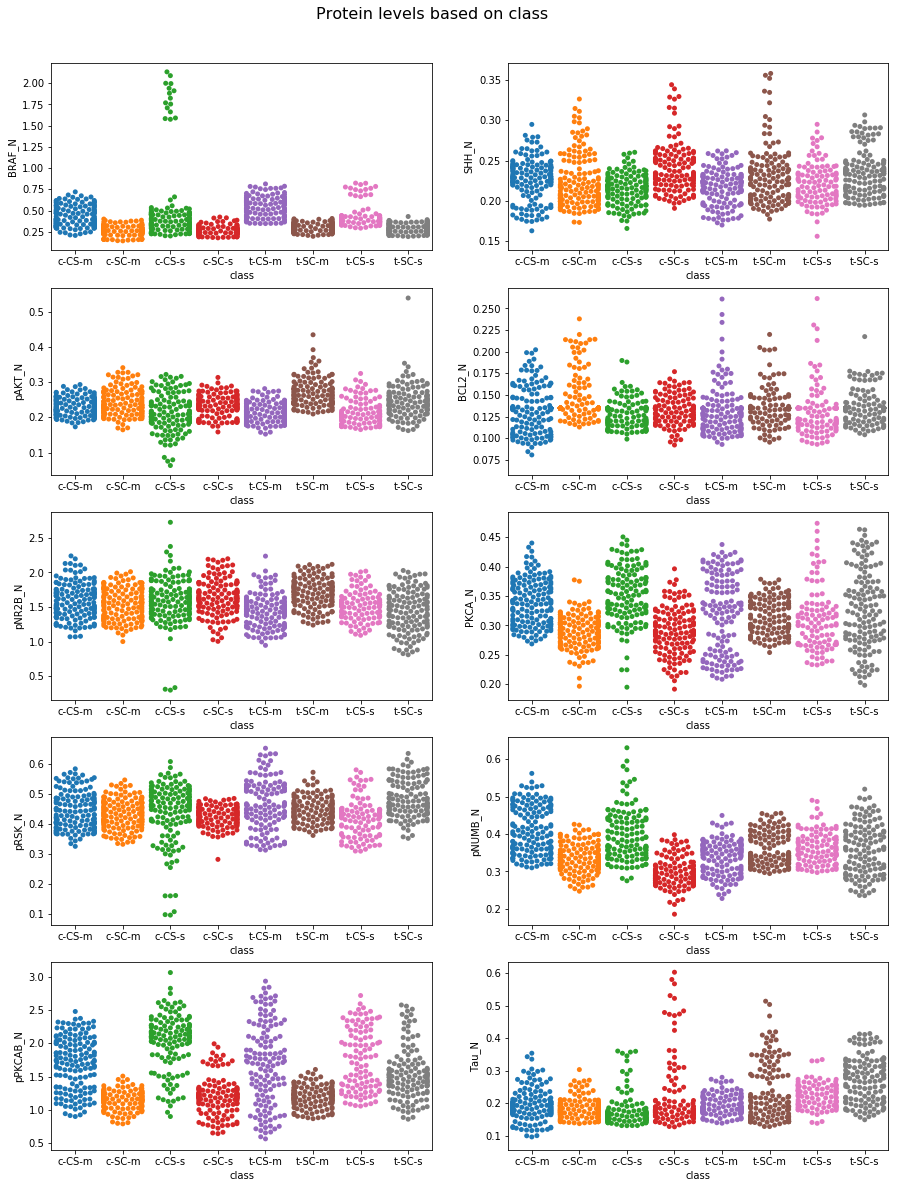

In [29]:
plot_many(10, 15, 20, 'class', dataset, 'Protein levels based on class')

To take a closer look on these proteins, the dataset was separated into 4 categories, and thus are: (1) mice with memantine treatment, (2) mice with saline treatment, (3) mice with SC behaviour, (4) mice with CS behaviour. The purpose is to see what influence the mice to have different protein levels. Turns out, in each class, the treatments the mice received do not really affect their protein level. Instead, what influence the results are the behaviour they received.

In [30]:
def plot_comparison_scatter(x_col,y_col, df, df2, title):
    
    fig, axes = plt.subplots(ncols=2, figsize=(10,4))

    sns.swarmplot(x=x_col, y=y_col, data=df, ax=axes[0])
    
    sns.swarmplot(x=x_col, y=y_col, data=df2, ax=axes[1])
    plt.title(title , x=-0.2, y=1.1, fontsize=16)

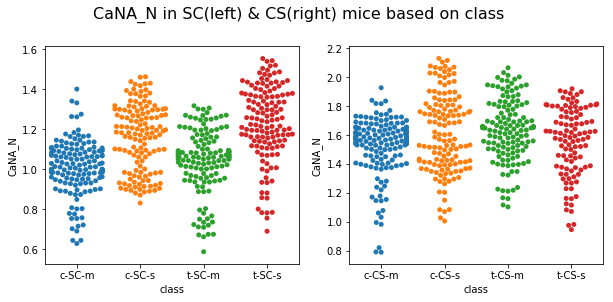

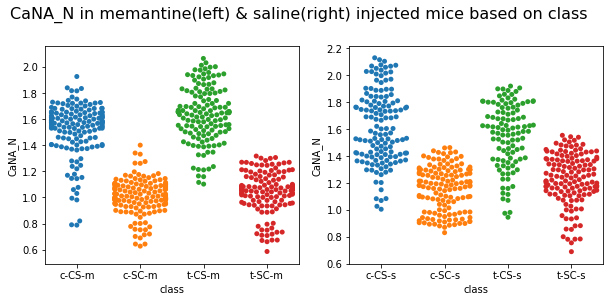

In [31]:
plot_comparison_scatter('class', 'CaNA_N',sc_data, cs_data, 'CaNA_N in SC(left) & CS(right) mice based on class')
plot_comparison_scatter('class', 'CaNA_N',memantine_data, saline_data, 'CaNA_N in memantine(left) & saline(right) injected mice based on class')

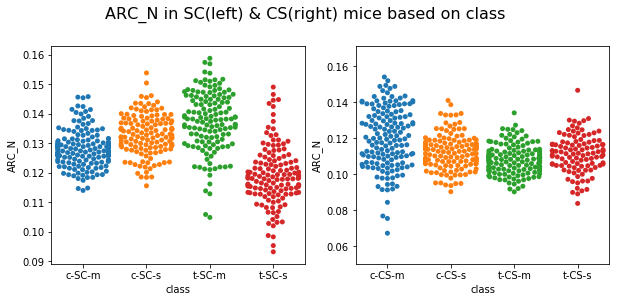

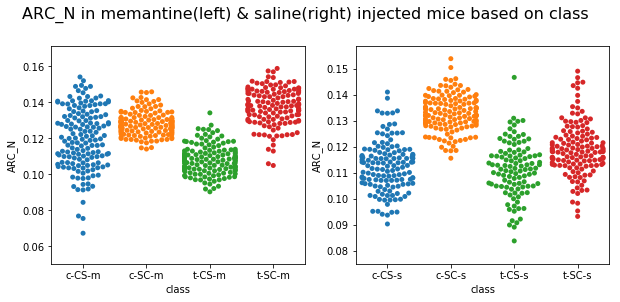

In [32]:
plot_comparison_scatter('class', 'ARC_N',sc_data, cs_data, 'ARC_N in SC(left) & CS(right) mice based on class')
plot_comparison_scatter('class', 'ARC_N',memantine_data, saline_data, 'ARC_N in memantine(left) & saline(right) injected mice based on class')

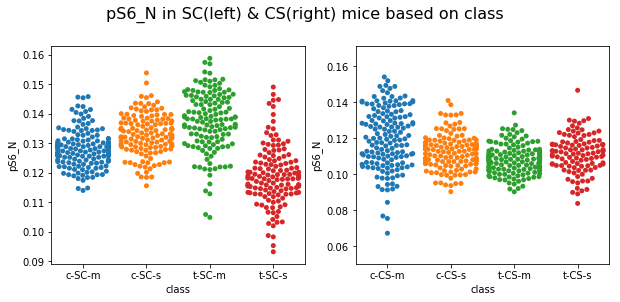

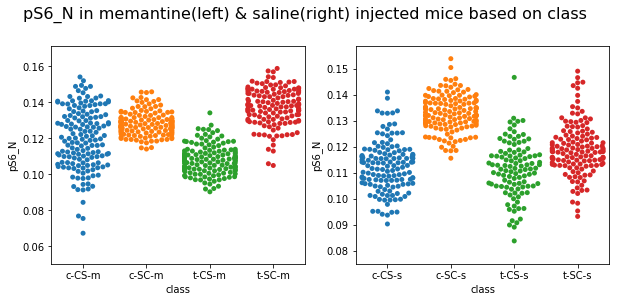

In [33]:
plot_comparison_scatter('class', 'pS6_N',sc_data, cs_data, 'pS6_N in SC(left) & CS(right) mice based on class')
plot_comparison_scatter('class', 'pS6_N',memantine_data, saline_data, 'pS6_N in memantine(left) & saline(right) injected mice based on class')

The proteins are also plotted randomly against the treatment, genotype, and behaviour without being categorized into the classes to see whether the mice with certain genotype, behaviour, and class have unique differences in the protein levels. So, the next hypothesises are:


•The memantine and saline injections affect the protein inside the mice


•Mice with down syndrome (trisomic) have different protein level than normal mice


•Mice that were stimulated to learn have different protein levels than mice that were not


For instance, mice that were injected with saline have a different level of a protein than the ones that were injected with memantine despite the behaviour they received. However, after randomly plotted the proteins against the treatment and genotype, nothing unique is found within the graphs as the difference in treatment and genotype do not seem to affect the protein levels.


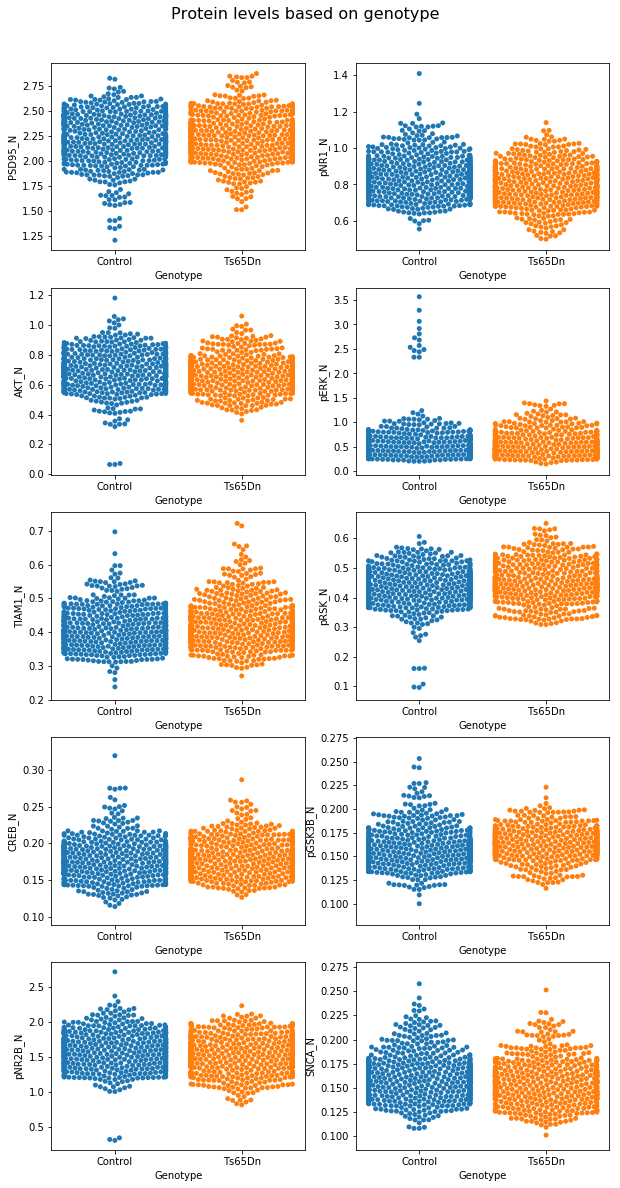

In [34]:
plot_many(10, 10, 20, 'Genotype', dataset, 'Protein levels based on genotype')

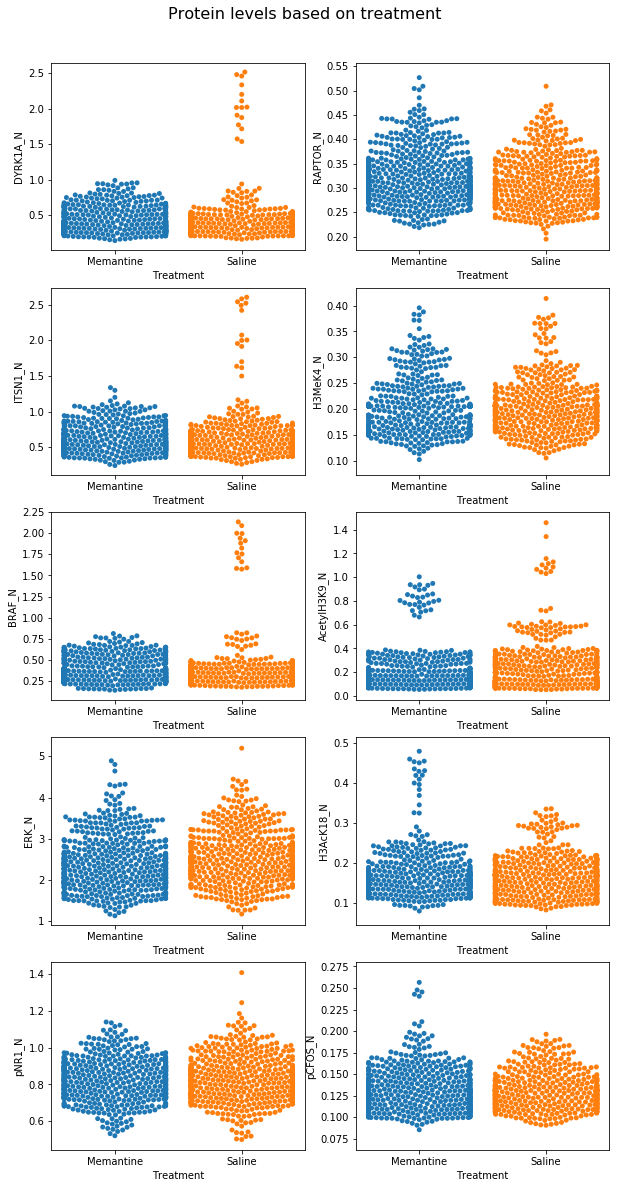

In [35]:
plot_many(10, 10, 20, 'Treatment', dataset, 'Protein levels based on treatment')

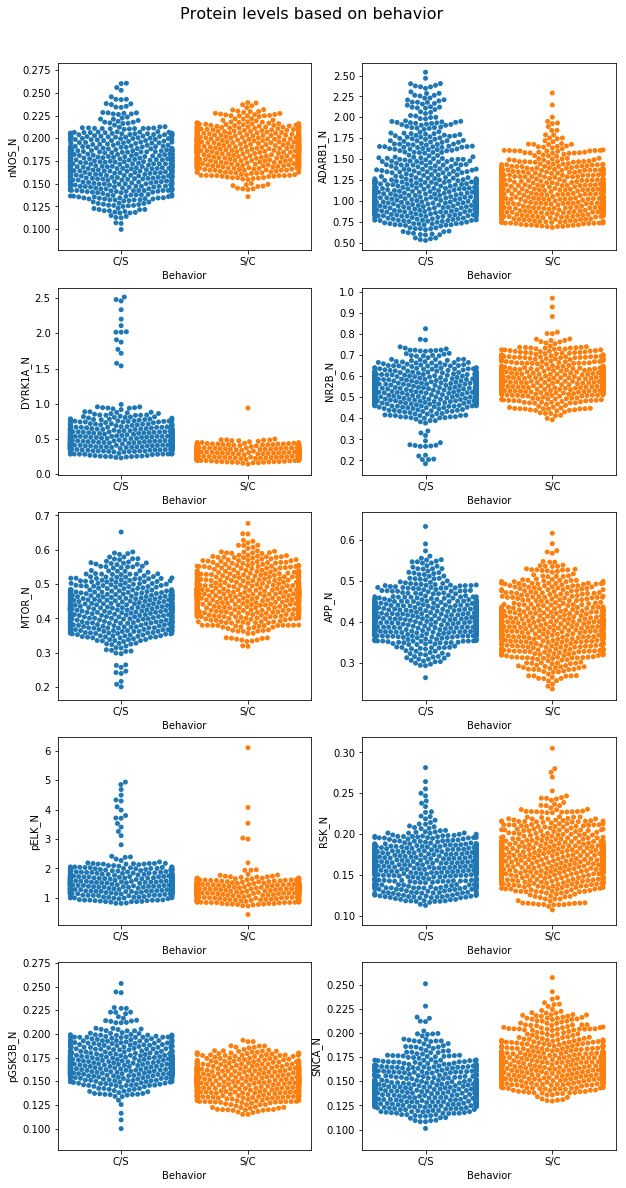

In [36]:
plot_many(10, 10, 20, 'Behavior', dataset, 'Protein levels based on behavior')

Because several outliners were found during data exploration, those values were handled by using Z-score, which is the value that is above the average of all values that are being observed. Often outliers are values that have Z-scores higher than three. In this project, the Z-score was calculated and the outliers were dropped.

In [37]:
from scipy import stats

z = np.abs(stats.zscore(dataset.iloc[: , 1 : 78]))
threshold = 3


In [38]:
dataset.iloc[: , 1 : 78] = dataset.iloc[: , 1 : 78][(z < 3).all(axis=1)]
dataset.dropna(inplace=True)

In [39]:
dataset.size

67240

Task 3: Data Modelling
The student should select the features appropriately. The model should be trained and evaluated appropriately, and the parameters of the model should be tuned appropriately.

According to the dataset's source (https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression), the aim is to identify subsets of proteins that are discriminant between the classes. 

In the end, the expected outcomes are recommendations of what model to use for the best result to predict the class of the mice based on the protein, what are the parameters, and what kind of treatment/ behaviour impact the protein level the most in both control and trisomy mice.

The feature selection process was done with hill climbing algorithm. The method used in based on the hill climbing code that was taught in the tutorial class

In [40]:
from sklearn import neighbors, datasets
from sklearn.utils import shuffle

feature_indexs = []
curr_max = 0.0
col_rand = shuffle(range(1, 78), random_state=1)

for curr_feature in range (0, 77):
    
    feature_indexs.append(col_rand[curr_feature])
    data = dataset.iloc[:, feature_indexs]
    X_train, X_test, y_train, y_test = train_test_split(data, dataset['class'], test_size=0.4, random_state=0)
    
    clf = KNeighborsClassifier(5, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < curr_max:
        feature_indexs.remove(col_rand[curr_feature])
    else:
        curr_max = cur_Score
        print("Score with " + str(len(feature_indexs)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.18597560975609756
Score with 2 selected features: 0.24085365853658536
Score with 3 selected features: 0.3048780487804878
Score with 4 selected features: 0.3719512195121951
Score with 5 selected features: 0.4268292682926829
Score with 6 selected features: 0.45426829268292684
Score with 7 selected features: 0.4969512195121951
Score with 8 selected features: 0.5396341463414634
Score with 9 selected features: 0.551829268292683
Score with 10 selected features: 0.7042682926829268
Score with 11 selected features: 0.725609756097561
Score with 12 selected features: 0.7530487804878049
Score with 13 selected features: 0.7560975609756098
Score with 14 selected features: 0.7652439024390244
Score with 15 selected features: 0.8871951219512195
Score with 16 selected features: 0.8963414634146342
Score with 17 selected features: 0.9085365853658537
Score with 18 selected features: 0.9085365853658537
Score with 19 selected features: 0.9451219512195121
Score with 20 select

In [41]:
feature_num = len(feature_indexs)
selected_cols= dataset.columns[feature_indexs]
selected_cols

Index(['Bcatenin_N', 'NUMB_N', 'JNK_N', 'EGR1_N', 'GluR3_N', 'GluR4_N',
       'P3525_N', 'RRP1_N', 'GFAP_N', 'pERK_N', 'ARC_N', 'P38_N', 'BDNF_N',
       'pCFOS_N', 'pPKCG_N', 'pNR2A_N', 'AKT_N', 'CaNA_N', 'PSD95_N',
       'pMTOR_N', 'NR2B_N', 'MTOR_N', 'SHH_N', 'RAPTOR_N', 'Tau_N', 'pNUMB_N',
       'CDK5_N', 'S6_N', 'H3AcK18_N', 'BAX_N', 'pMEK_N', 'CREB_N', 'BRAF_N',
       'SNCA_N', 'pAKT_N', 'pELK_N'],
      dtype='object')

In [42]:
new_dataset = dataset[['class']]

for i in range(0, feature_num):
    new_dataset.insert(i+1, selected_cols[i], dataset.iloc[:, feature_indexs[i]])
    
new_dataset.sample(3)

,class,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,GFAP_N,...,CDK5_N,S6_N,H3AcK18_N,BAX_N,pMEK_N,CREB_N,BRAF_N,SNCA_N,pAKT_N,pELK_N
933,t-CS-s,2.222513,0.236190,0.245601,0.174739,0.214745,0.135695,0.337721,0.170524,0.127191,...,0.362494,0.609184,0.186127,0.210974,0.255460,0.158492,0.399226,0.151002,0.211781,1.462873
158,c-SC-m,2.035431,0.157756,0.230591,0.235191,0.261672,0.138805,0.268449,0.146712,0.101155,...,0.289282,0.250753,0.169609,0.158635,0.275508,0.175799,0.286544,0.178966,0.266215,1.240465
925,t-CS-s,2.203452,0.213867,0.245645,0.137273,0.189949,0.107585,0.295952,0.151140,0.123685,...,0.348255,0.477431,0.115589,0.191903,0.260189,0.181876,0.377977,0.166775,0.225987,1.260508


With scklearn’s train_test_split, the dataset was separated into the dataset for training and testing. The training data and labels were then separated into X_train, y_train and X_test, y_test in the training and testing dataset respectfully.  

In [43]:
df_train2, df_test2 = train_test_split(new_dataset, test_size=0.1, random_state=100)

In [44]:
df_train2['class'].value_counts(dropna=False)

c-CS-m    125
t-CS-m    107
t-SC-s    105
c-SC-m     94
c-SC-s     90
c-CS-s     77
t-CS-s     70
t-SC-m     70
Name: class, dtype: int64

In [45]:
X_train2 = df_train2.iloc[: , 1: feature_num+1]

X_test2 = df_test2.iloc[: , 1: feature_num+1]
X_test2.sample(3)

,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,GFAP_N,pERK_N,...,CDK5_N,S6_N,H3AcK18_N,BAX_N,pMEK_N,CREB_N,BRAF_N,SNCA_N,pAKT_N,pELK_N
684,1.977299,0.180838,0.278661,0.186228,0.210419,0.107665,0.273653,0.152455,0.111976,0.562807,...,0.304671,0.371497,0.149820,0.200479,0.270526,0.188611,0.376277,0.122994,0.231177,1.187666
814,2.546827,0.171866,0.243911,0.183135,0.264211,0.144402,0.263062,0.146220,0.117703,0.410292,...,0.278565,0.327943,0.169609,0.196268,0.294683,0.189537,0.307890,0.177225,0.251286,1.364151
810,2.658399,0.184574,0.231935,0.183135,0.264528,0.150439,0.264376,0.144024,0.106300,0.384770,...,0.279114,0.353646,0.169609,0.199695,0.284757,0.181660,0.296420,0.148225,0.234214,1.327926


In [46]:
y_train2 = df_train2.loc[ : , ['class']]

y_test2 = df_test2.loc[ : , ['class']]



The chosen models are decision tree and KNN. The parameters for both algorithms are selected with the help of GridSearchCV. 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score


param_decisionTree = {
    'criterion': ["entropy", "gini"],
    'splitter':["best", "random"],
    'max_depth': [20,30,40,50],
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': list(range(2, 10)),
}
kf = KFold(n_splits=3)

search_decisionTree = GridSearchCV(tree.DecisionTreeClassifier(), param_decisionTree, cv=kf)
search_decisionTree.fit(X_train2, y_train2)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [20, 30, 40, 50],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [48]:
params_decisionTree = search_decisionTree.best_params_
params_decisionTree

{'criterion': 'gini',
 'max_depth': 50,
 'max_leaf_nodes': 70,
 'min_samples_split': 3,
 'splitter': 'best'}

In [49]:
param_knn = {
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric':['euclidean', 'manhattan'],
    'n_neighbors': list(range(1, 20)),
}
kf = KFold(n_splits=3)

search_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=kf)
search_knn.fit(X_train2, np.ravel(y_train2,order='C'))

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

With KNN, the output parameter was always the same. So, it was chosen to construct the model later on.  

In [50]:
params_knn = search_knn.best_params_
params_knn

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 1,
 'weights': 'uniform'}

For decision tree, after testing several parameters that are considered to be the best by GridSearchCV with cross-validation(the cross validation can be seen 3 cells bellow this), the  parameter with the best accuracy after testing several of them with cross-validation is as following:

In [51]:
params_decisionTree ={'criterion': 'gini',
 'max_depth': 20,
 'max_leaf_nodes': 99,
 'min_samples_split': 2,
 'splitter': 'best'}

In [52]:
clf_decisionTree = tree.DecisionTreeClassifier(**params_decisionTree)
decisionTree = clf_decisionTree.fit(X_train2, y_train2)

clf_knn = KNeighborsClassifier(**params_knn)
knn = clf_knn.fit(X_train2, np.ravel(y_train2,order='C'))


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

scores_decisionTree = cross_val_score(clf_decisionTree, X_train2, y_train2, cv=50)
scores_knn = cross_val_score(clf_knn, X_train2, np.ravel(y_train2,order='C'), cv=50)

print("Average score for decision tree: " , scores_decisionTree.mean())
print("Average score for KNN: " , scores_knn.mean())

Average score for decision tree:  0.8364761904761905
Average score for KNN:  0.9959047619047618


Testing unseen test data to the model

In [54]:
print("Decision tree prediction accuracy :",decisionTree.score(X_test2, y_test2)*100,"%")
print("KNN prediction accuracy :",knn.score(X_test2, y_test2)*100,"%")

Decision tree prediction accuracy : 79.26829268292683 %
KNN prediction accuracy : 98.78048780487805 %


To evaluate both models, confusion matrices and classification reports are made based on the models above.

In [55]:
labels = dataset['class'].value_counts().index.tolist()
labels

['c-CS-m',
 't-SC-s',
 't-CS-m',
 'c-SC-m',
 'c-SC-s',
 'c-CS-s',
 't-SC-m',
 't-CS-s']

        c-CS-m  t-SC-s  t-CS-m  c-SC-m  c-SC-s  c-CS-s  t-SC-m  t-CS-s
c-CS-m      10       0       0       0       0       1       0       0
t-SC-s       0      14       0       0       0       0       0       0
t-CS-m       1       0       7       0       0       1       0       1
c-SC-m       0       1       0      13       1       0       2       0
c-SC-s       0       2       0       0       7       0       1       0
c-CS-s       1       0       1       0       0       3       0       0
t-SC-m       0       0       0       1       1       0       8       0
t-CS-s       0       0       1       0       0       1       0       3


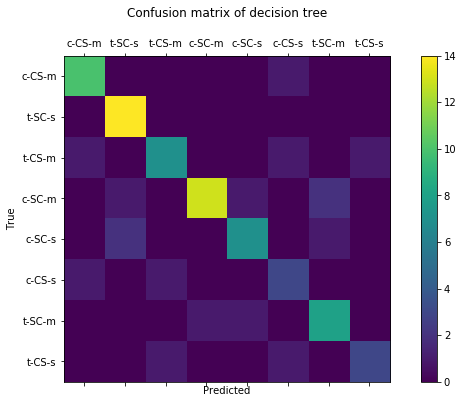

In [56]:
predicted_label_decisionTtree = clf_decisionTree .predict(X_test2)
predicted_label_knn = clf_knn.predict(X_test2)

cm = confusion_matrix(y_test2, predicted_label_decisionTtree, labels=labels)
cmtx = pd.DataFrame(
    cm, 
    index=labels, 
    columns=labels
)
print(cmtx)
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of decision tree', y=1.1)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

        c-CS-m  t-SC-s  t-CS-m  c-SC-m  c-SC-s  c-CS-s  t-SC-m  t-CS-s
c-CS-m      11       0       0       0       0       0       0       0
t-SC-s       0      14       0       0       0       0       0       0
t-CS-m       0       0      10       0       0       0       0       0
c-SC-m       0       0       0      16       0       0       1       0
c-SC-s       0       0       0       0      10       0       0       0
c-CS-s       0       0       0       0       0       5       0       0
t-SC-m       0       0       0       0       0       0      10       0
t-CS-s       0       0       0       0       0       0       0       5


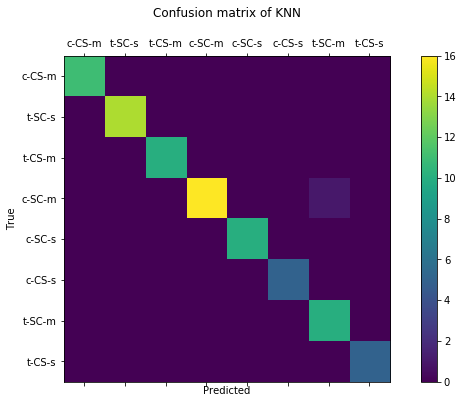

In [57]:
cm = confusion_matrix(y_test2, predicted_label_knn, labels = labels)
cmtx = pd.DataFrame(
    cm, 
    index=labels, 
    columns=labels
)
print(cmtx)
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of KNN', y=1.1)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [58]:
predicted_label_decisionTtree = clf_decisionTree.predict(X_test2)
predicted_label_knn = clf_knn.predict(X_test2)

dc_report = pd.DataFrame(classification_report(y_test2, predicted_label_decisionTtree, output_dict=True)).transpose()
dc_report.to_csv('dc_report.csv', index= True)

knn_report = pd.DataFrame(classification_report(y_test2, predicted_label_knn, output_dict=True)).transpose()
knn_report.to_csv('knn_report.csv', index= True)